## Importamos librerías

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, optimizers

## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
None
None
story
direction
None
really
None
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
None
None
as
myself
so
i
loved
the
fact
there
was
a
real
None
with
this
film
the
None
None
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
None
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
None
None
was
amazing
really
None
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
None
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
None
that
played
the
None
of
None
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
None
i
think
because
the
stars
that
play
them
all
None
up
are
such
a
big
None
for
the
whole
film
but
these
children
are
amazing
and
should
be
None
for
what
they
have
done
don't
you
think
the
whole
story
was
s

## Función de one-hot encoding

In [9]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

## Transformamos datos

In [10]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [11]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

## Red neuronal original

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [24]:
x_val = x_train[:10000]
partial_x_val = x_train[10000:]

y_val = y_train[:10000]
partial_y_val = y_train[10000:]


## Entrenando

In [25]:
history = model.fit(partial_x_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6652 - loss: 0.6275 - val_accuracy: 0.8054 - val_loss: 0.4715
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8335 - loss: 0.4304 - val_accuracy: 0.8488 - val_loss: 0.3765
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8623 - loss: 0.3534 - val_accuracy: 0.8468 - val_loss: 0.3606
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8704 - loss: 0.3250 - val_accuracy: 0.8557 - val_loss: 0.3456
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8705 - loss: 0.3153 - val_accuracy: 0.8381 - val_loss: 0.3758
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8737 - loss: 0.3043 - val_accuracy: 0.8627 - val_loss: 0.3325
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8769 - loss: 0.3011 - val_accuracy: 0.8565 - val_loss: 0.3422
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8841 - loss: 0.2837 - val_accuracy: 0.8565 - v

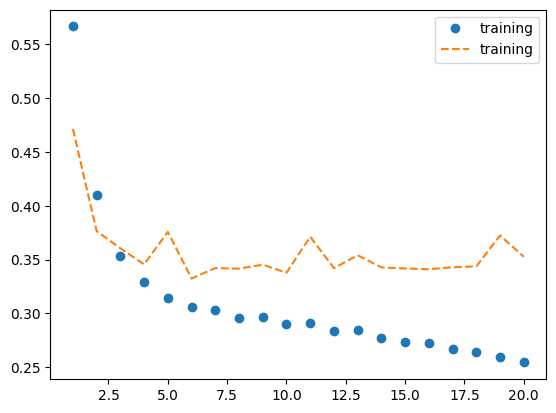

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'training')
plt.legend()
plt.show()


In [27]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8452 - loss: 0.3582


[0.35471948981285095, 0.847599983215332]

In [28]:
history_dict

{'accuracy': [0.7487999796867371,
  0.8439333438873291,
  0.8590666651725769,
  0.8666666746139526,
  0.8700666427612305,
  0.875,
  0.8741999864578247,
  0.8787999749183655,
  0.8757333159446716,
  0.879800021648407,
  0.8795333504676819,
  0.8813333511352539,
  0.8826000094413757,
  0.8846666812896729,
  0.8870000243186951,
  0.8869333267211914,
  0.8902666568756104,
  0.8913999795913696,
  0.89246666431427,
  0.8957333564758301],
 'loss': [0.566717267036438,
  0.41053950786590576,
  0.3531327247619629,
  0.3289463222026825,
  0.3140636086463928,
  0.30558648705482483,
  0.30283501744270325,
  0.295594722032547,
  0.2971198260784149,
  0.28998178243637085,
  0.29066258668899536,
  0.28410017490386963,
  0.2845667004585266,
  0.27719613909721375,
  0.27379322052001953,
  0.2724422216415405,
  0.26719871163368225,
  0.26376479864120483,
  0.25987598299980164,
  0.25441911816596985],
 'val_accuracy': [0.805400013923645,
  0.848800003528595,
  0.8468000292778015,
  0.8557000160217285,
  

## Modelo menos complejo

In [36]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(partial_x_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8870 - loss: 0.2838 - val_accuracy: 0.8610 - val_loss: 0.3364
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8824 - loss: 0.2873 - val_accuracy: 0.8608 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8842 - loss: 0.2874 - val_accuracy: 0.8610 - val_loss: 0.3384
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8867 - loss: 0.2766 - val_accuracy: 0.8606 - val_loss: 0.3393
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8832 - loss: 0.2815 - val_accuracy: 0.8576 - val_loss: 0.3428
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8839 - loss: 0.2781 - val_accuracy: 0.8555 - val_loss: 0.3459
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8845 - loss: 0.2813 - val_accuracy: 0.8594 - val_loss: 0.3421
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8880 - loss: 0.2758 - val_accuracy: 0.8589 - v

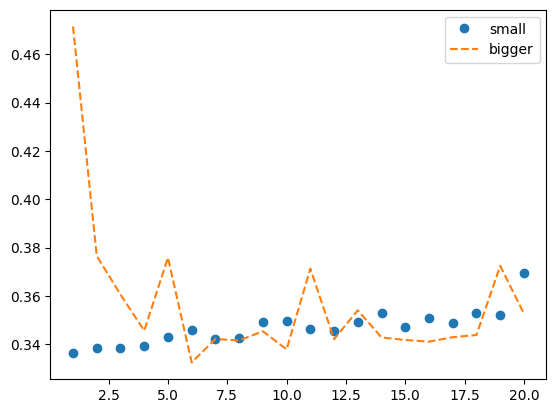

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values_2, 'o', label = 'small')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

## Regularización

In [40]:
from keras import regularizers

In [45]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(partial_x_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7021 - loss: 0.6854 - val_accuracy: 0.8138 - val_loss: 0.5498
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8356 - loss: 0.5126 - val_accuracy: 0.8384 - val_loss: 0.4497
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8565 - loss: 0.4197 - val_accuracy: 0.8543 - val_loss: 0.3927
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8604 - loss: 0.3800 - val_accuracy: 0.8480 - val_loss: 0.3892
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8711 - loss: 0.3512 - val_accuracy: 0.8609 - val_loss: 0.3662
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8752 - loss: 0.3387 - val_accuracy: 0.8568 - val_loss: 0.3713
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8745 - loss: 0.3292 - val_accuracy: 0.8623 - val_loss: 0.3615
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8773 - loss: 0.3303 - val_accuracy: 0.8433 - 

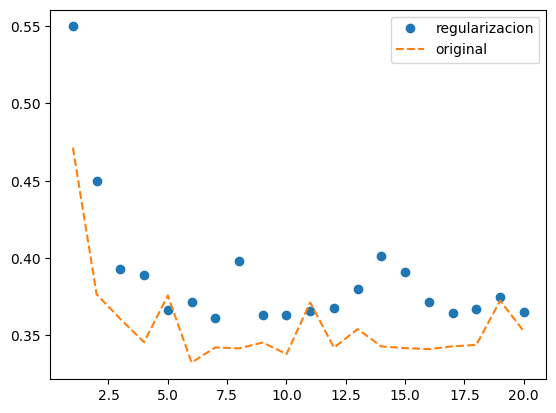

In [46]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values_3, 'o', label = 'regularizacion')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

## Dropout

In [47]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(partial_x_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5368 - loss: 0.6895 - val_accuracy: 0.7277 - val_loss: 0.6429
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6584 - loss: 0.6419 - val_accuracy: 0.7817 - val_loss: 0.6006
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7092 - loss: 0.6125 - val_accuracy: 0.8005 - val_loss: 0.5685
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7312 - loss: 0.5952 - val_accuracy: 0.8249 - val_loss: 0.5431
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7421 - loss: 0.5869 - val_accuracy: 0.8383 - val_loss: 0.5288
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7471 - loss: 0.5760 - val_accuracy: 0.8330 - val_loss: 0.5207
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7567 - loss: 0.5625 - val_accuracy: 0.8517 - val_loss: 0.5037
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7627 - loss: 0.5552 - val_accuracy: 0.8532 - 

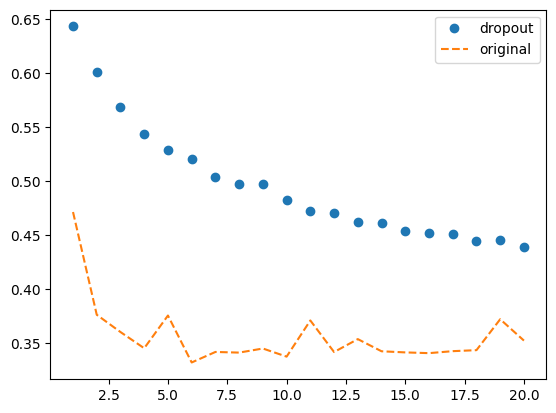

In [48]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values_4, 'o', label = 'dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()